### 1. node degree가 중간값인 node를 찾기 (tie brake: index 작은 것 우선)

In [5]:
!python gat.py --problem 1

degree of nodes: tensor([3., 3., 5.,  ..., 1., 4., 4.])
median degree: 3.0
median degree node index: 0


### 2. 위 node의 link를 찾고, 각각 attention coefficient를 찾기

In [23]:
!python gat.py --problem 2 --no-log

median edges: tensor([ 633, 1862, 2582,    0])
attention coefficient: tensor([0.2446, 0.1971, 0.2508, 0.2502])


c:\Users\choi\Graph-machine-learning\gat.py:142: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  median_node = torch.tensor(median_node, device=data.edge_index.device)


### 3. GCN과의 node classification을 비교

use normalization: True


c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\choi\Graph-machine-learning\gcn.py:208: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  labels = dataset.data.y.detach().numpy()


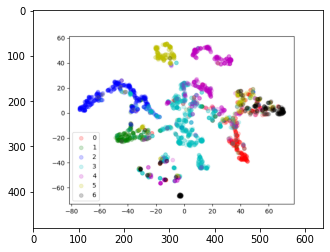

In [36]:
!python gcn.py --problem 8 --no-log

import matplotlib.pyplot as plt
import matplotlib.image as img

img_test = img.imread('gcn_result.png')
plt.imshow(img_test)


c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\choi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\choi\Graph-machine-learning\gat.py:177: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  labels = dataset.data.y.detach().numpy()


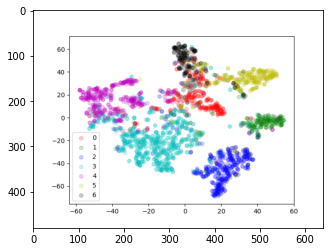

In [35]:
!python gat.py --problem 3 --no-log
img_test = img.imread('gat_result.png')
plt.imshow(img_test)

### 4. $\vec{\mathbf{a}} \in \mathbb{R}^{2F'}$일 경우 source와 target이 서로 다른 weight를 가지는지 설명

$W$는 같은 것을 사용하지만, $\vec{\mathbf{a}}$는 target이 $\mathbb{R}^{F'}$ 크기의 앞부분을 source가 $\mathbb{R}^{F'}$ 크기의 뒷부분을 적용하게 된다. 

### 5. 위의 문제가 코드에서 어떻게 구현되어 있는지 4번과 비교하여 설명

In [ ]:
class GATConv(MessagePassing):
    def __init__(self, ...):
        # ...
        # The learnable parameters to compute attention coefficients:
        self.att_src = Parameter(torch.empty(1, heads, out_channels))
        self.att_dst = Parameter(torch.empty(1, heads, out_channels)) # source와 target(dst)가 다른 parameter로 지정
        # ...
    def forward(self, ...) -> ... :
        # ...
        alpha_src = (x_src * self.att_src).sum(dim=-1)
        alpha_dst = None if x_dst is None else (x_dst * self.att_dst).sum(-1)
        alpha = (alpha_src, alpha_dst) # 연산시에도 따로 계산하게 됨
        # ...


### 6. 코드에서 weight가 달랐다면, 같게 할때 성능이 달라지는지 확인

In [ ]:
# 일반 코드 성능
!python gat.py --log

Epoch: 001, Loss: 1.9446, Train: 0.4214, Val: 0.2520, Test: 0.2400
Epoch: 002, Loss: 1.9413, Train: 0.2571, Val: 0.1760, Test: 0.2400
Epoch: 003, Loss: 1.9340, Train: 0.3786, Val: 0.2380, Test: 0.2400
Epoch: 004, Loss: 1.9295, Train: 0.4857, Val: 0.2840, Test: 0.2910
Epoch: 005, Loss: 1.9172, Train: 0.6571, Val: 0.3720, Test: 0.3760
Epoch: 006, Loss: 1.9116, Train: 0.7857, Val: 0.5480, Test: 0.5300
Epoch: 007, Loss: 1.9056, Train: 0.8929, Val: 0.7240, Test: 0.7430
Epoch: 008, Loss: 1.8988, Train: 0.9143, Val: 0.7580, Test: 0.8000
Epoch: 009, Loss: 1.8867, Train: 0.9214, Val: 0.7900, Test: 0.8000
Epoch: 010, Loss: 1.8893, Train: 0.9000, Val: 0.7700, Test: 0.8000
Epoch: 011, Loss: 1.8738, Train: 0.8929, Val: 0.7600, Test: 0.8000
Epoch: 012, Loss: 1.8720, Train: 0.9000, Val: 0.7700, Test: 0.8000
Epoch: 013, Loss: 1.8640, Train: 0.9000, Val: 0.7600, Test: 0.8000
Epoch: 014, Loss: 1.8550, Train: 0.8929, Val: 0.7680, Test: 0.8000
Epoch: 015, Loss: 1.8346, Train: 0.8929, Val: 0.7700, Test: 0.

In [ ]:
# weight를 같게 했을 때에 성능
!python gat.py --problem 6 --log

Epoch: 001, Loss: 1.9446, Train: 0.4214, Val: 0.2520, Test: 0.2390
Epoch: 002, Loss: 1.9413, Train: 0.2643, Val: 0.1780, Test: 0.2390
Epoch: 003, Loss: 1.9340, Train: 0.3786, Val: 0.2380, Test: 0.2390
Epoch: 004, Loss: 1.9295, Train: 0.4857, Val: 0.2900, Test: 0.2930
Epoch: 005, Loss: 1.9172, Train: 0.6643, Val: 0.3740, Test: 0.3810
Epoch: 006, Loss: 1.9116, Train: 0.7857, Val: 0.5540, Test: 0.5320
Epoch: 007, Loss: 1.9055, Train: 0.8929, Val: 0.7240, Test: 0.7390
Epoch: 008, Loss: 1.8987, Train: 0.9143, Val: 0.7560, Test: 0.7980
Epoch: 009, Loss: 1.8868, Train: 0.9214, Val: 0.7900, Test: 0.7990
Epoch: 010, Loss: 1.8893, Train: 0.9000, Val: 0.7680, Test: 0.7990
Epoch: 011, Loss: 1.8739, Train: 0.8929, Val: 0.7600, Test: 0.7990
Epoch: 012, Loss: 1.8720, Train: 0.9000, Val: 0.7700, Test: 0.7990
Epoch: 013, Loss: 1.8638, Train: 0.8929, Val: 0.7600, Test: 0.7990
Epoch: 014, Loss: 1.8550, Train: 0.8857, Val: 0.7680, Test: 0.7990
Epoch: 015, Loss: 1.8345, Train: 0.9000, Val: 0.7700, Test: 0.

### 7. dropout layer가 어디에 적용되는지와 그 역할을 서술

Dropout은 학습 과정에서 과적합을 방지하기 위해 사용되는 기법이다. 이 방법은 학습 단계마다 무작위로 일부 임베딩(feature vector)을 0으로 만듦으로써, 신경망이 특정 노드나 불필요한 노드에 과도하게 의존하는 것을 방지한다. 현재 코드에서는 GCNConv layer를 들어가기 전에 먼저 처리한다. 그리고, GCNConv에서 자체적으로 attention coefficient를 dropout하는 것도 있다. 

### 8. hyperparameter를 조절하여 최고의 성능을 찾기

### C. PubMed에서 최고의 성적을 내기